In [1]:
import torch
import torch.nn.functional as F

from torch import nn, optim
from PIL import Image
from torchvision import models, transforms
from torch.utils.data import DataLoader

from model.vit import  ViT
from utils.train_loop import TrainingLoop
from utils.data_loader import CustomDataset, data_split

/home/bach/anaconda3/envs/learn/lib/python3.7/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libc10_cuda.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [2]:
train_data, val_data, num_classes = data_split('data/mushrooms/', 0.8)

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


train_data = CustomDataset(train_data, transform=train_transform)
test_data = CustomDataset(val_data, transform=val_transform)

In [3]:
print(len(train_data), len(test_data))
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

5366 1347


In [3]:
model = models.resnet50(models.ResNet50_Weights.IMAGENET1K_V1)
fc = torch.nn.Linear(in_features=model.classifier[1].in_features, out_features=9, bias=True)
model.fc = fc

data_path = "data/mushrooms"
batch_size = 4
loss_fn = nn.CrossEntropyLoss()  
optim_fn = optim.Adam

/home/bach/anaconda3/envs/learn/lib/python3.7/site-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "


In [4]:
train_task = TrainingLoop(model, data_path, batch_size, loss_fn, optim_fn, 0.001, tf)

In [5]:
train_task.train(10, "test", 1)

2023-05-31 23:30:21.207820: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-31 23:30:21.645979: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-31 23:30:21.695441: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-31 23:30:21.695473: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

2023-05-31 23:30:23.758911 Start train on device cpu
Epoch 1


Training:   6%|▌         | 83/1342 [20:52<5:16:43, 15.09s/it]


RuntimeError: Sizes of tensors must match except in dimension 0. Expected size 1 but got size 3 for tensor number 1 in the list.

In [34]:
# This file is used to test functions and classes
import torch
import os
import sys
import torchvision
import matplotlib.pyplot as plt

ROOT = os.getcwd()
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))
    
from torch import nn, optim
from torchvision import models, transforms

from model.vit import  ViT
from utils.train_loop import TrainingLoop
from torchvision.models import resnet50, ResNet50_Weights
from utils.data_loader import data_split
 
 
model = resnet50(pretrained=False)
newfc = torch.nn.Linear(in_features=model.fc.in_features, out_features=9, bias=True)
model.fc = newfc


train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    # transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

data_path = "data/mushrooms"
batch_size = 16
loss_fn = nn.CrossEntropyLoss()  
optim_fn = optim.Adam

train_task = TrainingLoop(model, data_path, batch_size, loss_fn, optim_fn, 0.001, train_transform, val_transform)
# import ipdb
# ipdb.set_trace()

# train_task.train(10, "test", 1)

train_loader = train_task.train_loader
val_loader = train_task.val_loader

dataiter = iter(train_loader)
images, labels = next(dataiter)

torch.Size([3, 224, 224])
Russula


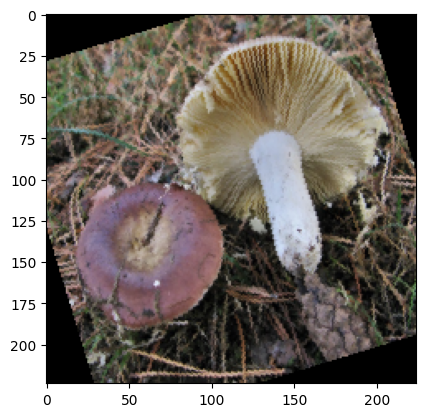

In [37]:
i = 8

img = images[i]
label = labels[i]

# permute = [0, 2, 1]
# img = img[permute, :]

# show images
print(img.shape)
print(train_task.class_names[label])
plt.imshow(img.permute(1,2,0))

'Lactarius'